In [1]:
# 必要なライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# データセットのロード
iris = load_iris()
X_1 = iris.data[:,[2,3]]
y_1 = iris.target

# データセットの分割
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

In [2]:
# 決定木による学習
from sklearn.tree import DecisionTreeClassifier
tree_1 = DecisionTreeClassifier(random_state=0)
tree_1.fit(X_1_train, y_1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [3]:
# 決定曲線をプロットする関数
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

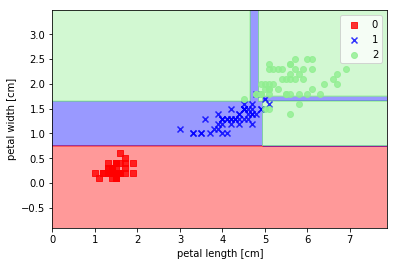

In [4]:
# 決定曲線をプロット
plot_decision_regions(X_1, y_1, tree_1)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.show()

In [5]:
# 精度の確認
print('train: {:.3f}'.format(tree_1.score(X_1_train, y_1_train)))
print('test : {:.3f}'.format(tree_1.score(X_1_test, y_1_test)))

train: 0.990
test : 0.956


In [6]:
# .dotファイルをエクスポート
from sklearn.tree import export_graphviz
export_graphviz(tree_1, out_file='tree_1.dot', feature_names=['petal length', 'petal width'],
               class_names=['setosa', 'versicolour', 'virsinica'], impurity=False, filled=True)

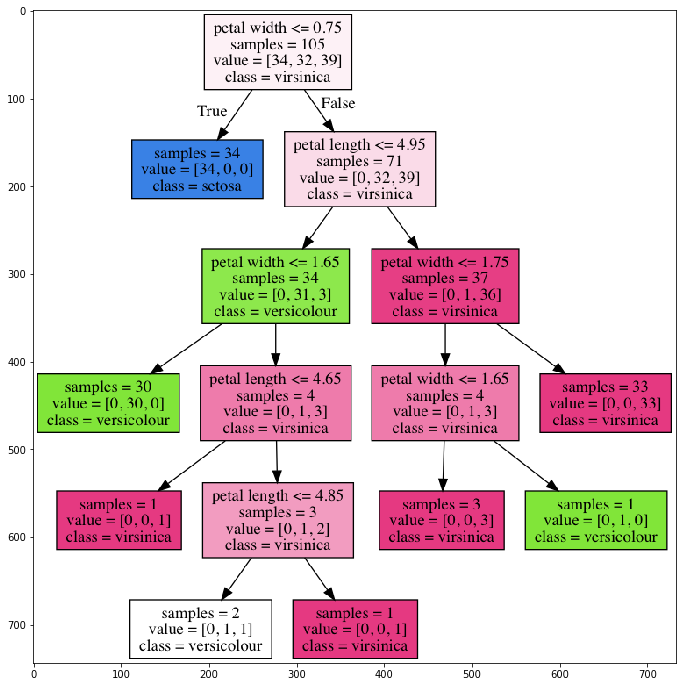

In [8]:
# 木構造を画像として出力
import cv2
img = cv2.imread('tree_1.png')
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.show()

In [9]:
# 決定木による学習
# max_depthを指定
from sklearn.tree import DecisionTreeClassifier
tree_2 = DecisionTreeClassifier(random_state=0, max_depth=3)
tree_2.fit(X_1_train, y_1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

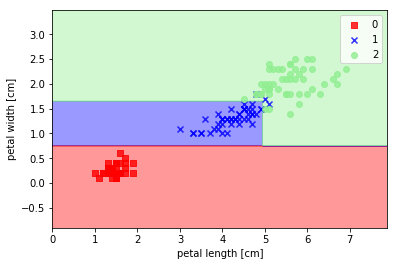

In [10]:
# 決定曲線をプロット
plot_decision_regions(X_1, y_1, tree_2)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.show()

In [11]:
# ランダムフォレストによる学習
from sklearn.ensemble import RandomForestClassifier
rfc_1 = RandomForestClassifier(random_state=0, n_estimators=10)
rfc_1.fit(X_1_train, y_1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

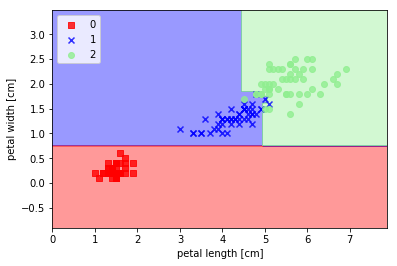

In [12]:
# 決定境界の出力
plot_decision_regions(X_1, y_1, rfc_1)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [13]:
# 正答率を出力
print('train accuracy: %.3f' % rfc_1.score(X_1_train, y_1_train))
print('test  accuracy: %.3f' % rfc_1.score(X_1_test, y_1_test))

train accuracy: 0.981
test  accuracy: 0.956


In [14]:
# brest_cancerデータセットの読み込み
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

# データセットの分割
from sklearn.model_selection import train_test_split
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(bc.data, bc.target, test_size=0.3, random_state=0)

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc_2 = RandomForestClassifier(random_state=0, n_estimators=100)
rfc_2.fit(X_2_train, y_2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
# 特徴量の重要度を出力
importances = rfc_2.feature_importances_
importances

array([0.02163832, 0.0160603 , 0.06024742, 0.03822632, 0.00537896,
       0.00670286, 0.08697012, 0.13127439, 0.00437402, 0.00268874,
       0.02795751, 0.00600722, 0.01623726, 0.02693081, 0.00255   ,
       0.00322232, 0.00519352, 0.00334574, 0.00662461, 0.00432006,
       0.09124751, 0.01303042, 0.15081306, 0.05391841, 0.01113124,
       0.01651618, 0.03479047, 0.1345056 , 0.00772685, 0.01036977])

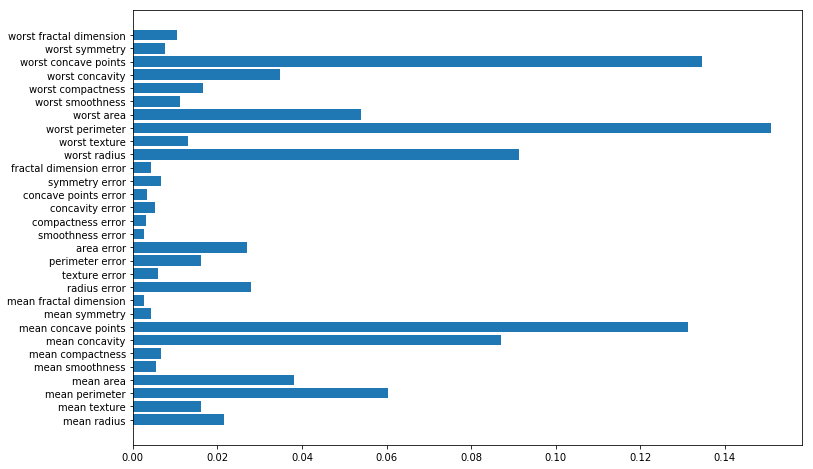

In [17]:
# 特徴量の重要度をグラフに出力
n_features = len(bc.feature_names)
plt.figure(figsize=(12, 8))
plt.barh(range(n_features), rfc_2.feature_importances_ , align='center')
plt.yticks(np.arange(n_features), bc.feature_names)
plt.show()

In [18]:
# 予測確率を出力する
rfc_2.predict_proba(X_2_test[0].reshape(1, -1))

array([[0.97, 0.03]])

In [19]:
# 勾配ブースティング木で学習させる
from sklearn.ensemble import GradientBoostingClassifier
gbct = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.1)
gbct.fit(X_2_train, y_2_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [20]:
# 正答率を出力
print('train accuracy: %.3f' % gbct.score(X_2_train, y_2_train))
print('test  accuracy: %.3f' % gbct.score(X_2_test, y_2_test))

train accuracy: 1.000
test  accuracy: 0.977


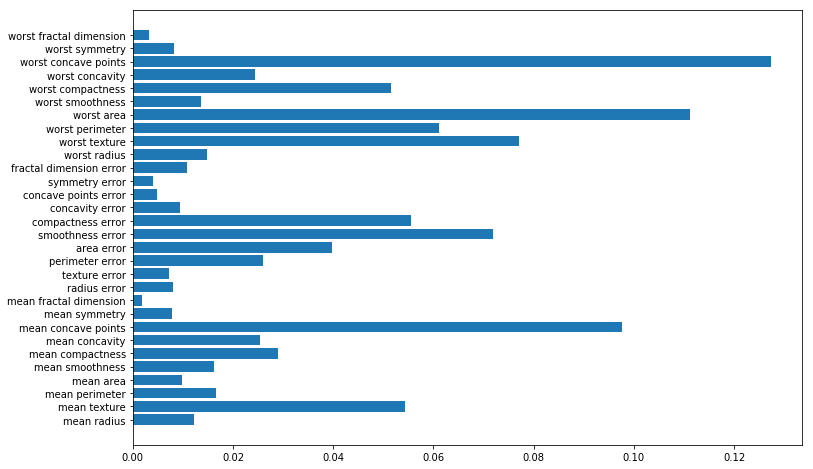

In [21]:
# 特徴量の重要度をグラフに出力
n_features = len(bc.feature_names)
plt.figure(figsize=(12, 8))
plt.barh(range(n_features), gbct.feature_importances_ , align='center')
plt.yticks(np.arange(n_features), bc.feature_names)
plt.show()

In [22]:
# 予測確率を出力する
gbct.predict_proba(X_2_test[0].reshape(1, -1))

array([[0.99885011, 0.00114989]])